In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.linalg import norm
from sklearn.metrics import r2_score
from abc import ABC, abstractmethod

In [2]:
X = np.linspace(0,20)

In [3]:
a = -2
b = 1
Y = a * X + b

In [4]:
class Optimizing(ABC) :
    # Constructor
    def __init__(self,input_vector,output_vector,learn_rate,max_iter,theta_0,theta_1,counter) :
        self.input_vector = input_vector
        self.output_vector = output_vector
        self.learn_rate = learn_rate
        self.max_iter = max_iter
        self.theta_0 = theta_0
        self.theta_1 = theta_1
        self.counter = counter
        self.predicted , self.cost_list , self.theta_0_list , self.theta_1_list = [] , [] , [] , []
        
        
       
    # Settres    
    def set_input_vector(self,input_vector):
        self.input_vector = input_vector
    def set_output_vector(self,output_vector):
        self.output_vector = output_vector
    def set_learn_rate(sel,learn_rate):
        self.learn_rate = learn_rate
    def set_max_iter(self,max_iter):
        self.max_iter = max_iter
            
    #Getters        
    def get_input_vector(self):
        return self.input_vector
    def get_output_vector(self):
        return self.output_vector
    def get_learn_rate(sel):
        return self.learn_rate
    def get_max_iter(self):
        return self.max_iter
    
    #----------------------------------------------------------------------------------------------------
    
    @abstractmethod
    def calculate_optimizer(self) :
        pass
    
    #----------------------------------------------------------------------------------------------------
    
    def calculate_predicted_y(self,theta_0 , theta_1) :
        predicted_Y = theta_0 + theta_1 * self.input_vector
        self.predicted.append(predicted_Y)
        return predicted_Y , self.predicted
    
    def calculate_cost_fun(self,predicted_Y) :
        cost_fun = sum((predicted_Y - self.output_vector)**2) / (2*len(self.output_vector))
        self.cost_list.append(cost_fun)
        return cost_fun , self.cost_list
    
    def calculate_gradient(self,predicted_Y) :
        grad_0 = sum(predicted_Y - self.output_vector) / len(self.output_vector)
        grad_1 = sum((predicted_Y - self.output_vector)* self.input_vector) / len(self.output_vector) 
        grad = np.array([grad_0,grad_1])
        return grad_0 , grad_1 , grad
    
    def calculate_momentum(self,momentum_0,momentum_1,grad_0,grad_1) :
            self.momentum_0 = (self.gamma * self.momentum_0) + (self.learn_rate * grad_0)
            self.momentum_1 = (self.gamma * self.momentum_1) + (self.learn_rate * grad_1)
            return self.momentum_0 , self.momentum_1                 
        
    #----------------------------------------------------------------------------------------------------
    
    @abstractmethod
    def update_thetas(self) :
        pass
    
    #----------------------------------------------------------------------------------------------------
    
    #----------------------------------------------------------------------------------------------------
    
    def draw_cost_fun(self) :
        max_iterations = list(range(self.counter))
        plt.plot(max_iterations,self.cost_list)
        plt.xlabel("Number of Iterations")
        plt.ylabel("Cost Function")
        plt.title("Cost Function (vs) Number of Iterations")
        plt.show()   
        print("---------------------------------------------------------------")
        
    def draw_theta_0(self) :
        plt.plot(self.theta_0_list,self.cost_list)
        plt.xlabel("0-Thetas")
        plt.ylabel("Cost Function")
        plt.title("Cost Function (vs) Thetas-0")
        plt.show()
        print("---------------------------------------------------------------")
    
    def draw_theta_1(self) :
        plt.plot(self.theta_1_list,self.cost_list)
        plt.xlabel("1-Thetas")
        plt.ylabel("Cost Function")
        plt.title("Cost Function (vs) Thetas-1")
        plt.show()
        print("---------------------------------------------------------------")
        
    def draw_all_predicted(self) :
        plt.scatter(self.input_vector,self.output_vector)
        for i in range(len(self.predicted)):    
            plt.plot(self.input_vector,self.predicted[i])
        plt.xlabel("Original X-Data")
        plt.ylabel("All Predicted Output")
        plt.title("All predicted Output (vs) Original X-Data")
        plt.show()
        print("---------------------------------------------------------------")
        
    def draw_the_fitted_line(self) :
        plt.scatter(self.input_vector,self.output_vector)
        plt.plot(self.input_vector,self.predicted[-1] , color ="red")
        plt.xlabel("Original X-Data")
        plt.ylabel("The fitted Line")
        plt.title("The fitted Line (vs) Original X-Data")
        plt.show()

In [5]:
class Batch_Gradient(Optimizing) :
    def __init__(self,input_vector,output_vector,learn_rate,max_iter,theta_0,theta_1,counter) :
        super().__init__(input_vector,output_vector,learn_rate,max_iter,theta_0,theta_1,counter)
        
    def update_thetas(self,theta_0,theta_1,grad_0,grad_1) :
        self.theta_0 = self.theta_0 - self.learn_rate * grad_0
        self.theta_1 = self.theta_1 - self.learn_rate * grad_1    
        self.theta_0_list.append(theta_0)
        self.theta_1_list.append(theta_1)
        return self.theta_0 , self.theta_1 , self.theta_0_list , self.theta_1_list
        
        
    def calculate_optimizer(self) :        
        for i in range(self.max_iter): 
            # calculate h(theta)
            predicted_Y , predicted = self.calculate_predicted_y(self.theta_0,self.theta_1)
            # calculate cost function
            cost_fun , cost_list = self.calculate_cost_fun(predicted_Y)
            # calculate gradient
            grad_0 , grad_1 , grad = self.calculate_gradient(predicted_Y)
            # update thetas
            self.theta_0 , self.theta_1 , self.theta_0_list , self.theta_1_list = self.update_thetas(self.theta_0,self.theta_1,grad_0,grad_1)
            self.counter += 1
            if len(self.cost_list) > 1 :
                if norm(grad) < 0.0001 :
                    break
                elif np.absolute(self.cost_list[i] - self.cost_list[i-1]) < 0.0001 :
                    break
                elif np.absolute(norm([self.theta_0_list[i],self.theta_1_list[i]]) - norm([self.theta_0_list[i-1],self.theta_1_list[i-1]])) < 0.0001 :
                    break          
        return self.theta_0_list , self.theta_1_list , self.cost_list , self.predicted , self.theta_0_list[-1] , self.theta_1_list[-1] , self.counter
    
    def draw_(self,cost_list,counter) :
        max_iterations = list(range(counter))
        plt.plot(max_iterations,cost_list)   
    

In [6]:
batch = Batch_Gradient(X,Y,0.0005,300,0,0,0)
theta_0_list_batch , theta_1_list_batch , cost_list_batch , predicted_batch , optim_theta_0_batch , optim_theta_1_batch , counter_batch = batch.calculate_optimizer()
hypo_batch = optim_theta_0_batch + optim_theta_1_batch * X
print(r2_score(Y,hypo_batch))

0.9976312051531401


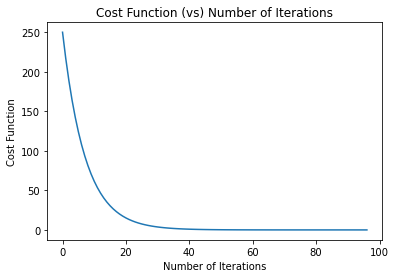

---------------------------------------------------------------


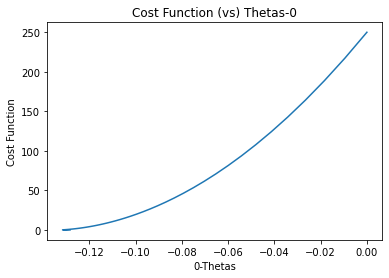

---------------------------------------------------------------


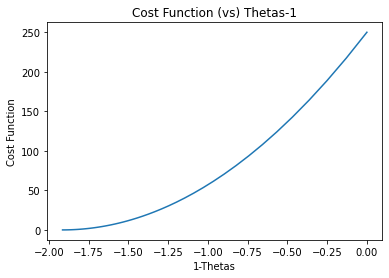

---------------------------------------------------------------


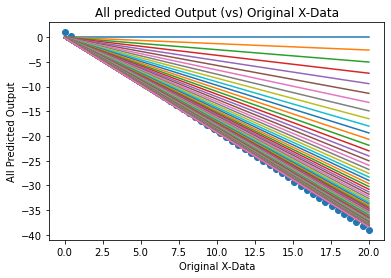

---------------------------------------------------------------


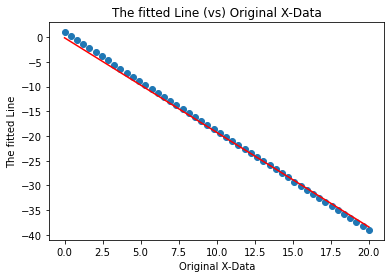

In [7]:
batch.draw_cost_fun()
batch.draw_theta_0() 
batch.draw_theta_1()
batch.draw_all_predicted()
batch.draw_the_fitted_line()

# -----------------------------------------------------------------------------------------------------------

In [8]:
class Mini_Batch_Gradient(Optimizing) :
    def __init__(self,input_vector,output_vector,learn_rate,max_iter,theta_0,theta_1,counter,batch_size) :
        super().__init__(input_vector,output_vector,learn_rate,max_iter,theta_0,theta_1,counter)
        self.batch_size = batch_size
        self.samples_num = int(len(Y) / self.batch_size)
    
    def split_to_batches(self,j) :
        start_index = ((j-1)*self.batch_size)
        end_index = (j*self.batch_size)
        if j == 1 :
            x_batches = self.input_vector[:end_index]
            y_batches = self.output_vector[:end_index]
        elif j == self.samples_num :
            x_batches = self.input_vector[start_index:]
            y_batches = self.output_vector[start_index:]
        else :
            x_batches = self.input_vector[start_index:end_index]
            y_batches = self.output_vector[start_index:end_index]
        b = len(x_batches)    
        return x_batches , y_batches , b     
    
    def calculate_predicted_y(self,theta_0 , theta_1,x_batches) :
        predicted_Y = theta_0 + theta_1 * x_batches
        self.predicted.append(predicted_Y)
        return predicted_Y , self.predicted    
    
    def calculate_cost_fun(self,predicted_Y,y_batches,b) :
        cost_fun = sum((predicted_Y - y_batches)**2) / (2*b)
        self.cost_list.append(cost_fun)
        return cost_fun , self.cost_list
    
    def calculate_gradient(self,predicted_Y,x_batches,y_batches,b) :
        grad_0 = sum(predicted_Y - y_batches) / b
        grad_1 = sum((predicted_Y - y_batches)* x_batches) / b 
        grad = np.array([grad_0,grad_1])
        return grad_0 , grad_1 , grad
    
    def update_thetas(self,theta_0,theta_1,grad_0,grad_1) :
        self.theta_0 = self.theta_0 - (self.learn_rate * grad_0)
        self.theta_1 = self.theta_1 - (self.learn_rate * grad_1)    
        self.theta_0_list.append(self.theta_0)
        self.theta_1_list.append(self.theta_1)
        return self.theta_0 , self.theta_1 , self.theta_0_list , self.theta_1_list
        
        
    def calculate_optimizer(self) :
        for i in range(self.max_iter): 
            for j in range(1,self.samples_num) :   
                x_batches , y_batches , b = self.split_to_batches(j)
                # calculate h(theta)
                predicted_Y , predicted = self.calculate_predicted_y(self.theta_0,self.theta_1,x_batches)
                # calculate cost function
                cost_fun , cost_list = self.calculate_cost_fun(predicted_Y,y_batches,b)
                # calculate gradient
                grad_0 , grad_1 , grad = self.calculate_gradient(predicted_Y,x_batches,y_batches,b)
                # update thetas
                self.theta_0 , self.theta_1 , self.theta_0_list , self.theta_1_list = self.update_thetas(self.theta_0,self.theta_1,grad_0,grad_1)
                self.counter += 1
            if len(self.cost_list) > 1 :
                if norm(grad) < 0.0001 :
                    break
                elif np.absolute(self.cost_list[i] - self.cost_list[i-1]) < 0.0001 :
                    break
                elif np.absolute(norm([self.theta_0_list[i],self.theta_1_list[i]]) - norm([self.theta_0_list[i-1],self.theta_1_list[i-1]])) < 0.0001 :
                    break          
        return self.theta_0_list , self.theta_1_list , self.cost_list , self.predicted , self.theta_0_list[-1] , self.theta_1_list[-1] , self.counter
    
    def draw_(self,cost_list,counter) :
        max_iterations = list(range(counter))
        plt.plot(max_iterations,cost_list)   
    

In [9]:
mini_batch = Mini_Batch_Gradient(X,Y,0.0005,300,0,0,0,10)

In [10]:
theta_0_list_mini_batch , theta_1_list_mini_batch , cost_list_mini_batch , predicted_mini_batch , optim_theta_0_mini_batch , optim_theta_1_mini_batch , counter_mini_batch = mini_batch.calculate_optimizer()
hypo_mini_batch = optim_theta_0_mini_batch + optim_theta_1_mini_batch * X
print(r2_score(Y,hypo_mini_batch))

0.9970430639501229


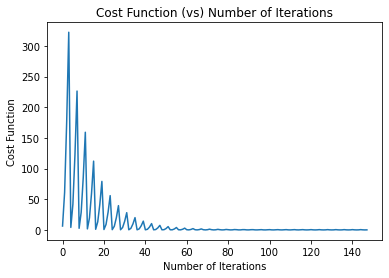

---------------------------------------------------------------


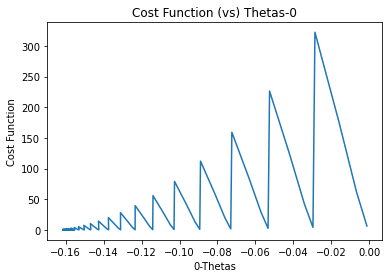

---------------------------------------------------------------


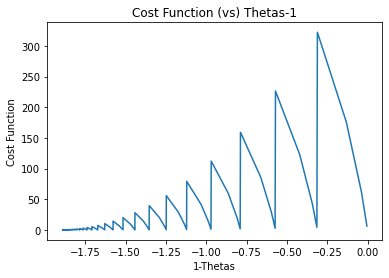

---------------------------------------------------------------


In [11]:
mini_batch.draw_cost_fun()
mini_batch.draw_theta_0()
mini_batch.draw_theta_1()

# -----------------------------------------------------------------------------------------------------------

In [12]:
class Stochastic_Gradient(Optimizing) :
    def __init__(self,input_vector,output_vector,learn_rate,max_iter,theta_0,theta_1,counter) :
        super().__init__(input_vector,output_vector,learn_rate,max_iter,theta_0,theta_1,counter)
    
    
    def calculate_predicted_y(self,theta_0 , theta_1,j) :
        predicted_Y = theta_0 + theta_1 * self.input_vector[j]
        self.predicted.append(predicted_Y)
        return predicted_Y , self.predicted    
    
    def calculate_cost_fun(self,predicted_Y,j) :
        cost_fun = ((predicted_Y - self.output_vector[j])**2) 
        self.cost_list.append(cost_fun)
        return cost_fun , self.cost_list
    
    def calculate_gradient(self,predicted_Y,j) :
        grad_0 = (predicted_Y - self.output_vector[j]) 
        grad_1 = ((predicted_Y - self.output_vector[j])* self.input_vector[j]) 
        grad = np.array([grad_0,grad_1])
        return grad_0 , grad_1 , grad
    
    def update_thetas(self,theta_0,theta_1,grad_0,grad_1) :
        self.theta_0 = self.theta_0 - self.learn_rate * grad_0
        self.theta_1 = self.theta_1 - self.learn_rate * grad_1    
        self.theta_0_list.append(theta_0)
        self.theta_1_list.append(theta_1)
        return self.theta_0 , self.theta_1 , self.theta_0_list , self.theta_1_list
        
        
    def calculate_optimizer(self) :
        samples_num = len(self.output_vector)
        for i in range(self.max_iter): 
            for j in range(samples_num) :
                # calculate h(theta)
                predicted_Y , predicted = self.calculate_predicted_y(self.theta_0,self.theta_1,j)
                # calculate cost function
                cost_fun , cost_list = self.calculate_cost_fun(predicted_Y,j)
                # calculate gradient
                grad_0 , grad_1 , grad = self.calculate_gradient(predicted_Y,j)
                # update thetas
                self.theta_0 , self.theta_1 , self.theta_0_list , self.theta_1_list = self.update_thetas(self.theta_0,self.theta_1,grad_0,grad_1)
                self.counter += 1
            if len(self.cost_list) > 1 :
                if norm(grad) < 0.0001 :
                    break
                elif np.absolute(self.cost_list[i] - self.cost_list[i-1]) < 0.0001 :
                    break
                elif np.absolute(norm([self.theta_0_list[i],self.theta_1_list[i]]) - norm([self.theta_0_list[i-1],self.theta_1_list[i-1]])) < 0.0001 :
                    break          
        return self.theta_0_list , self.theta_1_list , self.cost_list , self.predicted , self.theta_0_list[-1] , self.theta_1_list[-1] , self.counter
    
    def draw_(self,cost_list,counter) :
        max_iterations = list(range(counter))
        plt.plot(max_iterations,cost_list)   
    

In [13]:
stochastic = Stochastic_Gradient(X,Y,0.0005,300,0,0,0)

In [14]:
theta_0_list_stochastic , theta_1_list_stochastic , cost_list_stochastic , predicted_stochastic , optim_theta_0_stochastic , optim_theta_1_stochastic , counter_stochastic  = stochastic.calculate_optimizer()
hypo_stochastic = optim_theta_0_stochastic + optim_theta_1_stochastic * X
print(r2_score(Y,hypo_stochastic))

0.997088258215515


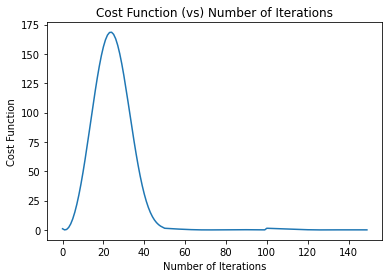

---------------------------------------------------------------


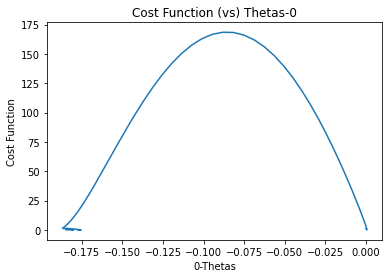

---------------------------------------------------------------


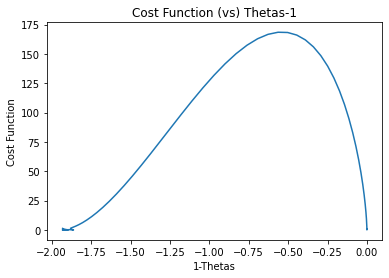

---------------------------------------------------------------


In [15]:
stochastic.draw_cost_fun()
stochastic.draw_theta_0()
stochastic.draw_theta_1()

# -----------------------------------------------------------------------------------------------------------

In [16]:
class Momentum_Gradient(Optimizing) :
    def __init__(self,input_vector,output_vector,learn_rate,max_iter,theta_0,theta_1,counter,momentum_0,momentum_1,gamma) :
        super().__init__(input_vector,output_vector,learn_rate,max_iter,theta_0,theta_1,counter)
        self.momentum_0 = momentum_0
        self.momentum_1 = momentum_1
        self.gamma = gamma
        
    def update_thetas(self,theta_0,theta_1,momentum_0,momentum_1) :
        self.theta_0 = self.theta_0 - self.momentum_0
        self.theta_1 = self.theta_1 - self.momentum_1    
        self.theta_0_list.append(theta_0)
        self.theta_1_list.append(theta_1)
        return self.theta_0 , self.theta_1 , self.theta_0_list , self.theta_1_list
            
        
    def calculate_optimizer(self) :
        for i in range(self.max_iter): 
           # calculate h(theta)
            predicted_Y , predicted = self.calculate_predicted_y(self.theta_0,self.theta_1)
            # calculate cost function
            cost_fun , cost_list = self.calculate_cost_fun(predicted_Y)
            # calculate gradient
            grad_0 , grad_1 , grad = self.calculate_gradient(predicted_Y)
            # calculate momentum 
            self.momentum_0 , self.momentum_1 = self.calculate_momentum(self.momentum_0,self.momentum_1,grad_0,grad_1)
            # update thetas
            self.theta_0 , self.theta_1 , self.theta_0_list , self.theta_1_list = self.update_thetas(self.theta_0,self.theta_1,grad_0,grad_1)
            self.counter += 1
            if len(self.cost_list) > 1 :
                if norm(grad) < 0.0001 :
                    break
                elif np.absolute(self.cost_list[i] - self.cost_list[i-1]) < 0.0001 :
                    break
                elif np.absolute(norm([self.theta_0_list[i],self.theta_1_list[i]]) - norm([self.theta_0_list[i-1],self.theta_1_list[i-1]])) < 0.0001 :
                    break          
        return self.theta_0_list , self.theta_1_list , self.cost_list , self.predicted , self.theta_0_list[-1] , self.theta_1_list[-1] , self.counter
    

In [17]:
A = -1 * X + 2

In [18]:
mo = Momentum_Gradient(X,A,0.0005,300,0,0,0,0,0,0.9)

In [19]:
theta_0_list_mo , theta_1_list_mo , cost_list_mo , predicted_mo , optim_theta_0_mo , optim_theta_1_mo , counter_mo = mo.calculate_optimizer()
hypo_mo = optim_theta_0_mo + optim_theta_1_mo * X
print(r2_score(A,hypo_mo))

0.9745347722999139


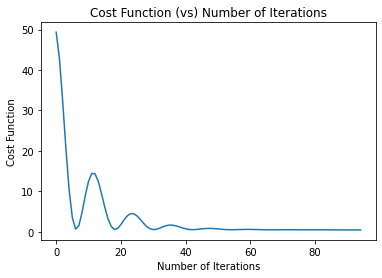

---------------------------------------------------------------


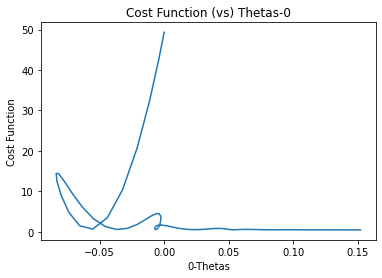

---------------------------------------------------------------


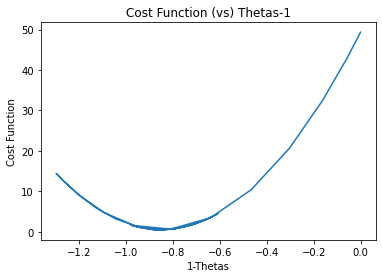

---------------------------------------------------------------


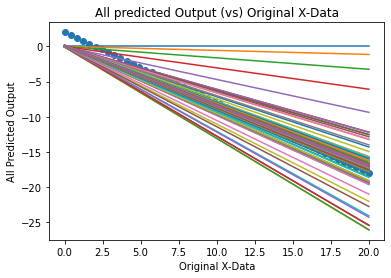

---------------------------------------------------------------


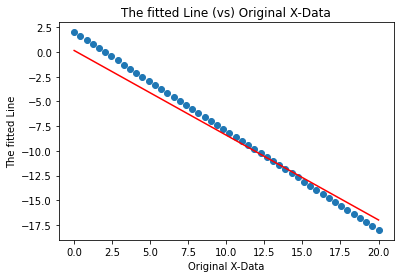

In [20]:
mo.draw_cost_fun()
mo.draw_theta_0()
mo.draw_theta_1()
mo.draw_all_predicted()
mo.draw_the_fitted_line()

# -----------------------------------------------------------------------------------------------------------

In [21]:
class NAG_Gradient(Optimizing) :
    def __init__(self,input_vector,output_vector,learn_rate,max_iter,theta_0,theta_1,counter,momentum_0,momentum_1,gamma) :
        super().__init__(input_vector,output_vector,learn_rate,max_iter,theta_0,theta_1,counter)
        self.momentum_0 = momentum_0
        self.momentum_1 = momentum_1
        self.gamma = gamma
        
        
    def update_thetas(self,theta_0_temp,theta_1_temp,grad_0_temp,grad_1_temp) :
        self.theta_0 = theta_0_temp - self.learn_rate * grad_0_temp
        self.theta_1 = theta_1_temp - self.learn_rate * grad_1_temp    
        self.theta_0_list.append(self.theta_0)
        self.theta_1_list.append(self.theta_1)
        return self.theta_0 , self.theta_1 , self.theta_0_list , self.theta_1_list
    
    def calculate_thetas_temp(self,theta_0,theta_1) :    
        theta_0_temp = self.theta_0 - (self.gamma * self.momentum_0)
        theta_1_temp = self.theta_1 - (self.gamma * self.momentum_1)
        return theta_0_temp , theta_1_temp
        
    def calculate_optimizer(self) :
        for i in range(self.max_iter): 
            # calculate h(theta)
            predicted_Y , predicted = self.calculate_predicted_y(self.theta_0,self.theta_1)
            # calculate cost function
            cost_fun , cost_list = self.calculate_cost_fun(predicted_Y)
            # calculate theta temp
            theta_0_temp, theta_1_temp = self.calculate_thetas_temp(self.theta_0,self.theta_1)
            # calculate h theta temp
            predicted_temp = theta_0_temp + (theta_1_temp * self.input_vector)
            # calculate gradient
            grad_0_temp , grad_1_temp , grad = self.calculate_gradient(predicted_temp) 
            # update thetas
            self.theta_0 ,self.theta_1 , self.theta_0_list , self.theta_1_list = self.update_thetas(theta_0_temp,theta_1_temp,grad_0_temp,grad_1_temp)
            # calculate momentum 
            self.momentum_0 ,self.momentum_1 = self.calculate_momentum(self.momentum_0,self.momentum_1,grad_0_temp,grad_1_temp)
            self.counter += 1
            # stop criteria
            if len(self.cost_list) > 1 :
                if norm(grad) < 0.0001 :
                    break
                elif np.absolute(self.cost_list[i] - self.cost_list[i-1]) < 0.0001 :
                    break
                elif np.absolute(norm([self.theta_0_list[i],self.theta_1_list[i]]) - norm([self.theta_0_list[i-1],self.theta_1_list[i-1]])) < 0.0001 :
                    break          
        return self.theta_0_list , self.theta_1_list , self.cost_list , self.predicted , self.theta_0_list[-1] , self.theta_1_list[-1] , self.counter

        
        
        
        
        

In [22]:
nag = NAG_Gradient(X,A,0.0005,300,0,0,0,0,0,0.9)
theta_0_list_nag , theta_1_list_nag , cost_list_nag , predicted_nag , optim_theta_0_nag , optim_theta_1_nag , counter_nag = nag.calculate_optimizer()
hypo_nag = optim_theta_0_nag + optim_theta_1_nag * X
print(r2_score(A,hypo_nag))

0.9723913840204572


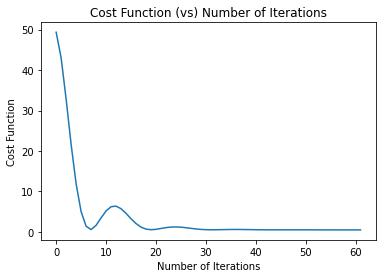

---------------------------------------------------------------


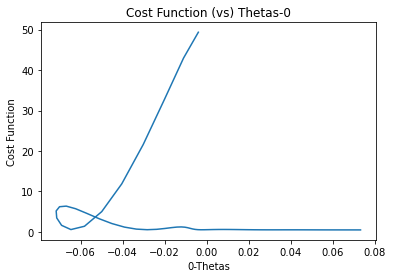

---------------------------------------------------------------


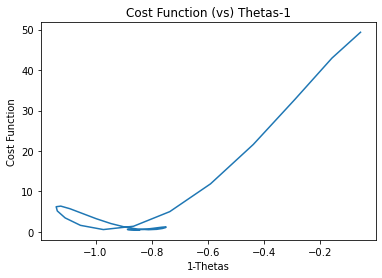

---------------------------------------------------------------


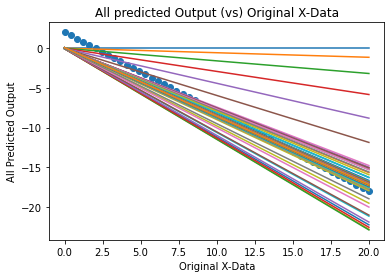

---------------------------------------------------------------


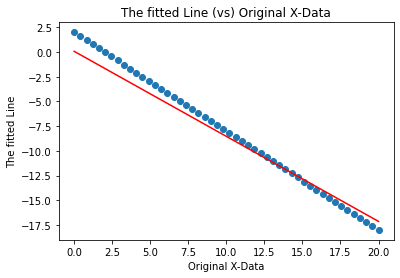

In [23]:
nag.draw_cost_fun()
nag.draw_theta_0()
nag.draw_theta_1()
nag.draw_all_predicted()
nag.draw_the_fitted_line()

# -----------------------------------------------------------------------------------------------------------

In [24]:
data = np.genfromtxt("RegData.csv",delimiter=",")

In [25]:
N = data[:,0]
M = data[:,1]

In [26]:
N

array([2.9000001 , 6.69999981, 4.9000001 , 7.9000001 , 9.80000019,
       6.9000001 , 6.0999999 , 6.19999981, 6.        , 5.0999999 ,
       4.69999981, 4.4000001 , 5.80000019])

In [27]:
M

array([4.        , 7.4000001 , 5.        , 7.19999981, 7.9000001 ,
       6.0999999 , 6.        , 5.80000019, 5.19999981, 4.19999981,
       4.        , 4.4000001 , 5.19999981])

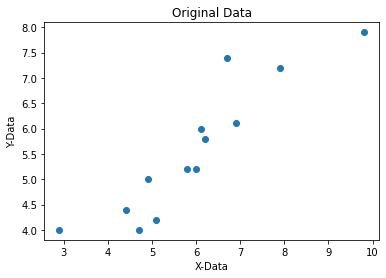

In [28]:
plt.scatter(N,M)
plt.xlabel("X-Data")
plt.ylabel("Y-Data")
plt.title("Original Data")
plt.show()

In [29]:
class Adagrda_Gradient(Optimizing) :
    def __init__(self,input_vector,output_vector,learn_rate,max_iter,theta_0,theta_1,counter,v_t_0,v_t_1,epsilon) :
        super().__init__(input_vector,output_vector,learn_rate,max_iter,theta_0,theta_1,counter)
        self.v_t_0 = v_t_0
        self.v_t_1 = v_t_1
        self.epsilon = epsilon
        
    def update_thetas(self,theta_0,theta_1,grad_0,grad_1) :
        self.theta_0 = self.theta_0 - ((self.learn_rate / ((np.sqrt(self.v_t_0)) + self.epsilon)) * grad_0)
        self.theta_1 = self.theta_1 - ((self.learn_rate / ((np.sqrt(self.v_t_1)) + self.epsilon)) * grad_1)   
        self.theta_0_list.append(self.theta_0)
        self.theta_1_list.append(self.theta_1)
        return self.theta_0 , self.theta_1 , self.theta_0_list , self.theta_1_list
    
    def calculate_v_t(self,grad_0,grad_1) :    
            self.v_t_0 = self.v_t_0 + (grad_0 ** 2)
            self.v_t_1 = self.v_t_1 + (grad_1 ** 2)
            return self.v_t_0 , self.v_t_1
        
    def calculate_optimizer(self) :
        for i in range(self.max_iter): 
            # calculate h(theta)
            predicted_Y , predicted = self.calculate_predicted_y(self.theta_0,self.theta_1)
            # calculate cost function
            cost_fun , cost_list = self.calculate_cost_fun(predicted_Y)
            # calculate gradient
            grad_0 , grad_1 , grad = self.calculate_gradient(predicted_Y) 
           # calculate v_t
            self.v_t_0 , self.v_t_1 = self.calculate_v_t(grad_0,grad_1)
            # update thetas
            self.theta_0 ,self.theta_1 , self.theta_0_list , self.theta_1_list = self.update_thetas(self.theta_0,self.theta_1,grad_0,grad_1)
            self.counter += 1
            # stop criteria
            if len(self.cost_list) > 1 :
                if norm(grad) < 0.0001 :
                    break
                elif np.absolute(self.cost_list[i] - self.cost_list[i-1]) < 0.0001 :
                    break
                elif np.absolute(norm([self.theta_0_list[i],self.theta_1_list[i]]) - norm([self.theta_0_list[i-1],self.theta_1_list[i-1]])) < 0.0001 :
                    break          
        return self.theta_0_list , self.theta_1_list , self.cost_list , self.predicted , self.theta_0_list[-1] , self.theta_1_list[-1] , self.counter

        
        
        
        
        

In [30]:
adagrad = Adagrda_Gradient(N,M,0.9,300,0,0,0,0,0,1e-8)

In [31]:
theta_0_list_adagrad , theta_1_list_adagrad , cost_list_adagrad , predicted_adagrad , optim_theta_0_adagrad , optim_theta_1_adagrad , counter_adagrad = adagrad.calculate_optimizer()
hypo_adagrad = optim_theta_0_adagrad + optim_theta_1_adagrad * N
print(r2_score(M,hypo_adagrad))

0.8152050663967769


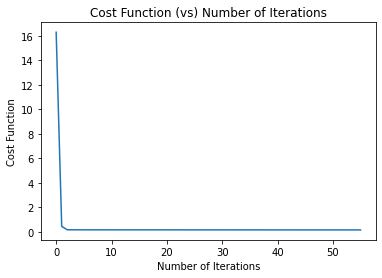

---------------------------------------------------------------


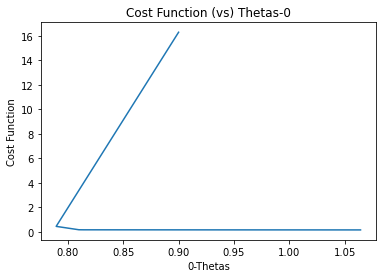

---------------------------------------------------------------


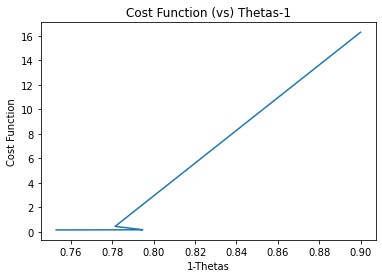

---------------------------------------------------------------


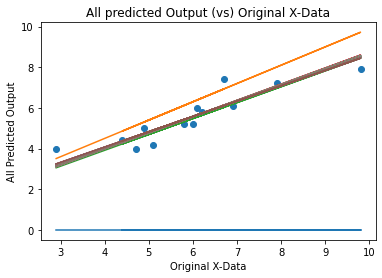

---------------------------------------------------------------


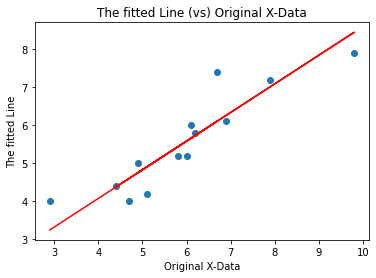

In [32]:
adagrad.draw_cost_fun()
adagrad.draw_theta_0()
adagrad.draw_theta_1()
adagrad.draw_all_predicted()
adagrad.draw_the_fitted_line()

# -----------------------------------------------------------------------------------------------------------

In [33]:
class RMSProp_Gradient(Optimizing) :
    def __init__(self,input_vector,output_vector,learn_rate,max_iter,theta_0,theta_1,counter,v_t_0,v_t_1,epsilon,beta) :
        super().__init__(input_vector,output_vector,learn_rate,max_iter,theta_0,theta_1,counter)
        self.v_t_0 = v_t_0
        self.v_t_1 = v_t_1
        self.epsilon = epsilon
        self.beta = beta
        
    def update_thetas(self,theta_0,theta_1,grad_0,grad_1) :
        self.theta_0 = self.theta_0 - ((self.learn_rate / ((np.sqrt(self.v_t_0)) + self.epsilon)) * grad_0)
        self.theta_1 = self.theta_1 - ((self.learn_rate / ((np.sqrt(self.v_t_1)) + self.epsilon)) * grad_1)   
        self.theta_0_list.append(self.theta_0)
        self.theta_1_list.append(self.theta_1)
        return self.theta_0 , self.theta_1 , self.theta_0_list , self.theta_1_list
    
    def calculate_v_t(self,grad_0,grad_1) :    
            self.v_t_0 = (self.beta * self.v_t_0) + (1 - self.beta ) * (grad_0 ** 2)
            self.v_t_1 = (self.beta * self.v_t_1) + (1 - self.beta ) * (grad_1 ** 2)
            return self.v_t_0 , self.v_t_1
        
    def calculate_optimizer(self) :
        for i in range(self.max_iter): 
            # calculate h(theta)
            predicted_Y , predicted = self.calculate_predicted_y(self.theta_0,self.theta_1)
            # calculate cost function
            cost_fun , cost_list = self.calculate_cost_fun(predicted_Y)
            # calculate gradient
            grad_0 , grad_1 , grad = self.calculate_gradient(predicted_Y) 
           # calculate v_t
            self.v_t_0 , self.v_t_1 = self.calculate_v_t(grad_0,grad_1)
            # update thetas
            self.theta_0 ,self.theta_1 , self.theta_0_list , self.theta_1_list = self.update_thetas(self.theta_0,self.theta_1,grad_0,grad_1)
            self.counter += 1
            # stop criteria
            if len(self.cost_list) > 1 :
                if norm(grad) < 0.0001 :
                    break
                elif np.absolute(self.cost_list[i] - self.cost_list[i-1]) < 0.0001 :
                    break
                elif np.absolute(norm([self.theta_0_list[i],self.theta_1_list[i]]) - norm([self.theta_0_list[i-1],self.theta_1_list[i-1]])) < 0.0001 :
                    break          
        return self.theta_0_list , self.theta_1_list , self.cost_list , self.predicted , self.theta_0_list[-1] , self.theta_1_list[-1] , self.counter

        
        
        
        
        

In [34]:
rmsprop = RMSProp_Gradient(N,M,0.9,300,0,0,0,0,0,1e-8,0.9)

In [35]:
theta_0_list_rmsprop , theta_1_list_rmsprop , cost_list_rmsprop , predicted_rmsprop , optim_theta_0_rmsprop , optim_theta_1_rmsprop , counter_rmsprop = rmsprop.calculate_optimizer()
hypo_rmsprop = optim_theta_0_rmsprop + optim_theta_1_rmsprop * N
print(r2_score(M,hypo_rmsprop))

0.8059503518785973


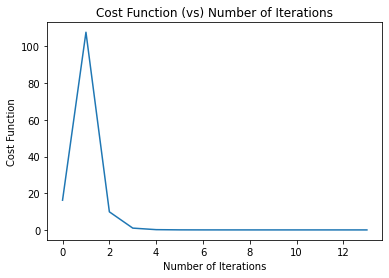

---------------------------------------------------------------


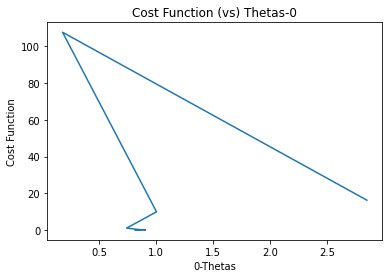

---------------------------------------------------------------


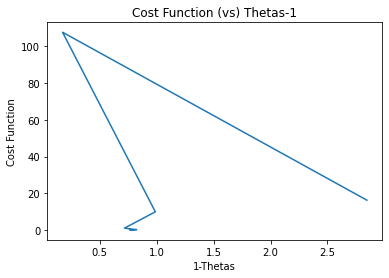

---------------------------------------------------------------


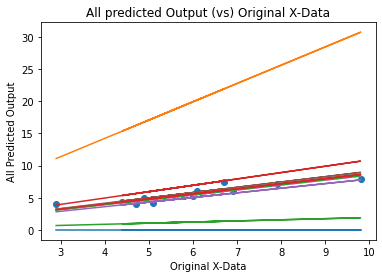

---------------------------------------------------------------


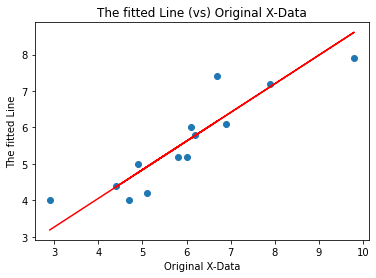

In [36]:
rmsprop.draw_cost_fun()
rmsprop.draw_theta_0()
rmsprop.draw_theta_1()
rmsprop.draw_all_predicted()
rmsprop.draw_the_fitted_line()

# -----------------------------------------------------------------------------------------------------------

In [37]:
class Adam_Gradient(Optimizing) :
    def __init__(self,input_vector,output_vector,learn_rate,max_iter,theta_0,theta_1,counter,v_t_0,v_t_1,momentum_0,momentum_1,epsilon,beta_1,beta_2) :
        super().__init__(input_vector,output_vector,learn_rate,max_iter,theta_0,theta_1,counter)
        self.v_t_0 = v_t_0
        self.v_t_1 = v_t_1
        self.momentum_0 = momentum_0
        self.momentum_1 = momentum_1
        self.epsilon = epsilon
        self.beta_1 = beta_1
        self.beta_2 = beta_2
        
    def update_thetas(self,theta_0,theta_1,v_t_0_hat,v_t_1_hat,momentum_0_hat,momentum_1_hat) :
        self.theta_0 = self.theta_0 - ((self.learn_rate / ((np.sqrt(v_t_0_hat)) + self.epsilon)) * momentum_0_hat)
        self.theta_1 = self.theta_1 - ((self.learn_rate / ((np.sqrt(v_t_1_hat)) + self.epsilon)) * momentum_1_hat)   
        self.theta_0_list.append(self.theta_0)
        self.theta_1_list.append(self.theta_1)
        return self.theta_0 , self.theta_1 , self.theta_0_list , self.theta_1_list
    
    def calculate_momentum(self,momentum_0,momentum_1,grad_0,grad_1) :
            self.momentum_0 = (self.beta_1 * self.momentum_0) + (1 - self.beta_1) * (grad_0)
            self.momentum_1 = (self.beta_1 * self.momentum_1) + (1 - self.beta_1) * (grad_1)
            return self.momentum_0 , self.momentum_1
    
    def calculate_v_t(self,grad_0,grad_1) :    
            self.v_t_0 = (self.beta_2 * self.v_t_0) + (1 - self.beta_2 ) * (grad_0 ** 2)
            self.v_t_1 = (self.beta_2 * self.v_t_1) + (1 - self.beta_2 ) * (grad_1 ** 2)
            return self.v_t_0 , self.v_t_1
        
    def calculate_momentum_hat(self,momentum_0,momentum_1) :
        momentum_0_hat = self.momentum_0 / (1 - np.power(self.beta_1,self.counter+1))
        momentum_1_hat = self.momentum_1 / (1 - np.power(self.beta_1,self.counter+1))
        return momentum_0_hat,momentum_1_hat
    
    def calculate_v_t_hat(self,v_t_0,v_t_1) :
        v_t_0_hat = self.v_t_0 / (1 - np.power(self.beta_2,self.counter+1))
        v_t_1_hat = self.v_t_1 / (1 - np.power(self.beta_2,self.counter+1))
        return v_t_0_hat , v_t_1_hat
        
    def calculate_optimizer(self) :
        for i in range(self.max_iter): 
            # calculate h(theta)
            predicted_Y , predicted = self.calculate_predicted_y(self.theta_0,self.theta_1)
            # calculate cost function
            cost_fun , cost_list = self.calculate_cost_fun(predicted_Y)
            # calculate gradient
            grad_0 , grad_1 , grad = self.calculate_gradient(predicted_Y) 
            # calculate momentum
            self.momentum_0 , self.momentum_1 = self.calculate_momentum(self.momentum_0,self.momentum_1,grad_0,grad_1)
            # calculate v_t
            self.v_t_0 , self.v_t_1 = self.calculate_v_t(grad_0,grad_1)
            # calculate momentum hat
            momentum_0_hat , momentum_1_hat = self.calculate_momentum_hat(self.momentum_0,self.momentum_1)
            # calculate v_t_hat
            v_t_0_hat , v_t_1_hat = self.calculate_v_t_hat(self.v_t_0,self.v_t_1)
            # update thetas
            self.theta_0 ,self.theta_1 , self.theta_0_list , self.theta_1_list = self.update_thetas(self.theta_0,self.theta_1,v_t_0_hat,v_t_1_hat,momentum_0_hat,momentum_1_hat)
            self.counter += 1
            # stop criteria
            if len(self.cost_list) > 1 :
                if norm(grad) < 0.0001 :
                    break
                elif np.absolute(self.cost_list[i] - self.cost_list[i-1]) < 0.0001 :
                    break
                elif np.absolute(norm([self.theta_0_list[i],self.theta_1_list[i]]) - norm([self.theta_0_list[i-1],self.theta_1_list[i-1]])) < 0.0001 :
                    break          
        return self.theta_0_list , self.theta_1_list , self.cost_list , self.predicted , self.theta_0_list[-1] , self.theta_1_list[-1] , self.counter

        
        
        
        
        

In [38]:
adam = Adam_Gradient(N,M,0.9,300,0,0,0,0,0,0,0,1e-8,0.9,0.999)

In [39]:
theta_0_list_adam , theta_1_list_adam , cost_list_adam , predicted_adam , optim_theta_0_adam , optim_theta_1_adam , counter_adam = adam.calculate_optimizer()
hypo_adam = optim_theta_0_adam + optim_theta_1_adam * N
print(r2_score(M,hypo_adam))

0.8210049678265985


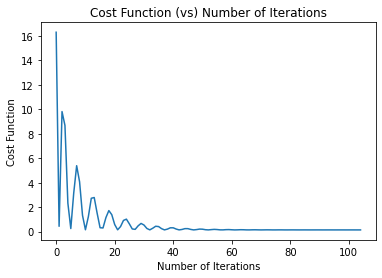

---------------------------------------------------------------


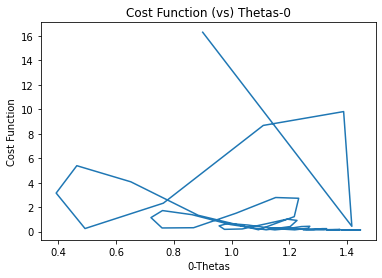

---------------------------------------------------------------


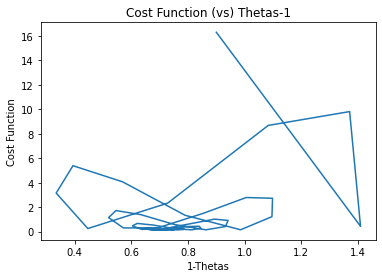

---------------------------------------------------------------


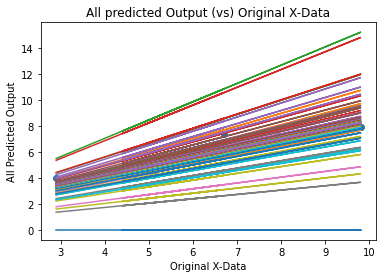

---------------------------------------------------------------


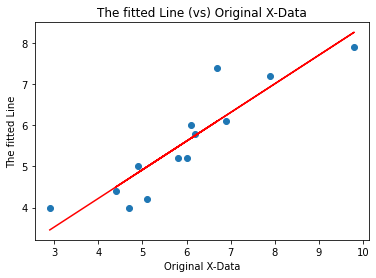

In [40]:
adam.draw_cost_fun()
adam.draw_theta_0()
adam.draw_theta_1()
adam.draw_all_predicted()
adam.draw_the_fitted_line()